# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | atafu village
Processing Record 3 of Set 1 | port mathurin
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | alice springs
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | ahmadnagar
Processing Record 9 of Set 1 | chimoio
Processing Record 10 of Set 1 | ust-nera
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | talnakh
Processing Record 13 of Set 1 | north bend
Processing Record 14 of Set 1 | gadzhiyevo
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | sortavala
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | bondo
Processing Record 19 of Set 1 | kruisfontein
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | cartagena
Processing Record 22 of Set 1 | college
Processing Record 2

Processing Record 39 of Set 4 | atherton
Processing Record 40 of Set 4 | karratha
Processing Record 41 of Set 4 | miahuatlan de porfirio diaz
Processing Record 42 of Set 4 | tolanaro
Processing Record 43 of Set 4 | nookat
City not found. Skipping...
Processing Record 44 of Set 4 | smithers
Processing Record 45 of Set 4 | shimoda
Processing Record 46 of Set 4 | carnarvon
Processing Record 47 of Set 4 | darnah
Processing Record 48 of Set 4 | punta cardon
Processing Record 49 of Set 4 | zyrya
Processing Record 50 of Set 4 | lata
Processing Record 1 of Set 5 | constantia
Processing Record 2 of Set 5 | cuajinicuilapa
Processing Record 3 of Set 5 | saint-felix-de-valois
Processing Record 4 of Set 5 | fale old settlement
Processing Record 5 of Set 5 | smirnovo
Processing Record 6 of Set 5 | camana
Processing Record 7 of Set 5 | codrington
Processing Record 8 of Set 5 | iquique
Processing Record 9 of Set 5 | whitehorse
Processing Record 10 of Set 5 | howrah
Processing Record 11 of Set 5 | embi

Processing Record 29 of Set 8 | gaiman
Processing Record 30 of Set 8 | dwarka
Processing Record 31 of Set 8 | fortaleza
Processing Record 32 of Set 8 | freetown
Processing Record 33 of Set 8 | kingston
Processing Record 34 of Set 8 | east london
Processing Record 35 of Set 8 | yeraliyev
Processing Record 36 of Set 8 | molde
Processing Record 37 of Set 8 | qaryat suluq
Processing Record 38 of Set 8 | berdigestyakh
Processing Record 39 of Set 8 | igarka
Processing Record 40 of Set 8 | lohardaga
Processing Record 41 of Set 8 | aldan
Processing Record 42 of Set 8 | urucui
Processing Record 43 of Set 8 | rudbar
Processing Record 44 of Set 8 | cuyamel
Processing Record 45 of Set 8 | la foa
Processing Record 46 of Set 8 | arcachon
Processing Record 47 of Set 8 | tionk essil
Processing Record 48 of Set 8 | rawai
Processing Record 49 of Set 8 | guildwood
Processing Record 50 of Set 8 | pale
Processing Record 1 of Set 9 | worland
Processing Record 2 of Set 9 | owando
Processing Record 3 of Set 9

Processing Record 21 of Set 12 | tha khanon
Processing Record 22 of Set 12 | abadan
Processing Record 23 of Set 12 | martinopolis
Processing Record 24 of Set 12 | luau
Processing Record 25 of Set 12 | bangassou
Processing Record 26 of Set 12 | labytnangi
Processing Record 27 of Set 12 | chui
Processing Record 28 of Set 12 | red bluff
Processing Record 29 of Set 12 | gualeguay
Processing Record 30 of Set 12 | ust-tsilma
Processing Record 31 of Set 12 | vilhena
Processing Record 32 of Set 12 | sarmiento
Processing Record 33 of Set 12 | ak-suu
Processing Record 34 of Set 12 | dalhart
Processing Record 35 of Set 12 | xiaoshi
Processing Record 36 of Set 12 | borshchiv
Processing Record 37 of Set 12 | magione
Processing Record 38 of Set 12 | port hedland
Processing Record 39 of Set 12 | palmer
Processing Record 40 of Set 12 | hayma'
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
98# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,-26.17,98,45,1.96,RU,1702246603
1,atafu village,-8.5421,-172.5159,28.53,79,96,6.98,TK,1702246605
2,port mathurin,-19.6833,63.4167,26.07,78,52,3.75,MU,1702246714
3,port-aux-francais,-49.3500,70.2167,3.56,78,56,9.91,TF,1702246575
4,avarua,-21.2078,-159.7750,27.03,78,75,11.83,CK,1702246526


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-26.17,98,45,1.96,RU,1702246603
1,atafu village,-8.5421,-172.5159,28.53,79,96,6.98,TK,1702246605
2,port mathurin,-19.6833,63.4167,26.07,78,52,3.75,MU,1702246714
3,port-aux-francais,-49.3500,70.2167,3.56,78,56,9.91,TF,1702246575
4,avarua,-21.2078,-159.7750,27.03,78,75,11.83,CK,1702246526


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

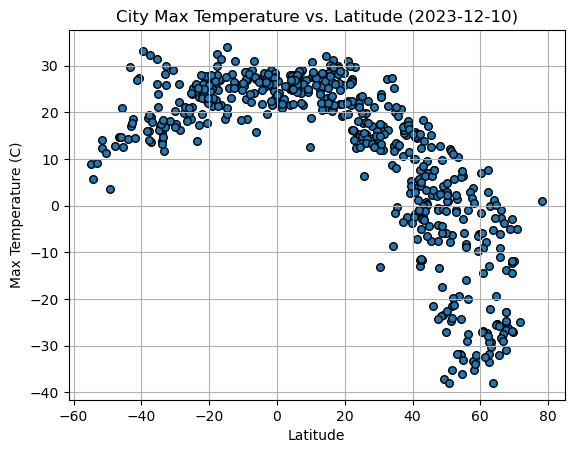

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(x = "Lat",
                  y = "Max Temp",
                  kind = "scatter",
                  edgecolors = "black",
                  s = 30
                 )

# Incorporate the other graph properties
plt.title(f"City Max Temperature vs. Latitude ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

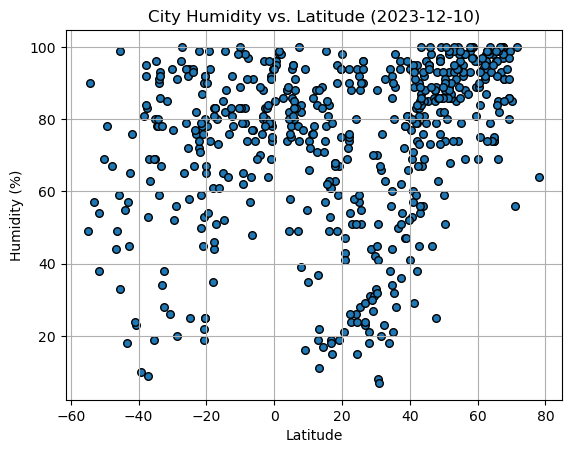

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(x = "Lat",
                  y = "Humidity",
                  kind = "scatter",
                  edgecolors = "black",
                  s = 30
                 )

# Incorporate the other graph properties
plt.title(f"City Humidity vs. Latitude ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

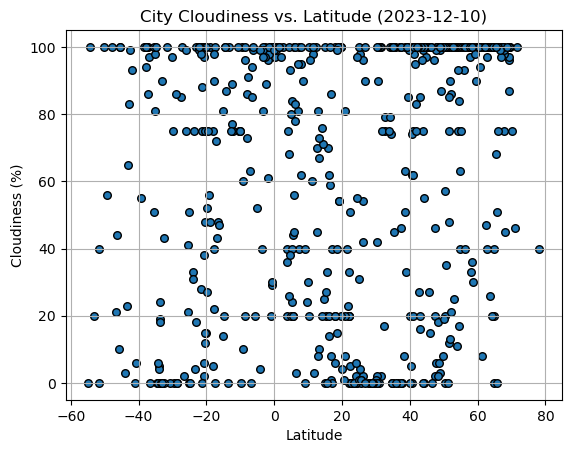

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(x = "Lat",
                  y = "Cloudiness",
                  kind = "scatter",
                  edgecolors = "black",
                  s = 30
                 )

# Incorporate the other graph properties
plt.title(f"City Cloudiness vs. Latitude ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

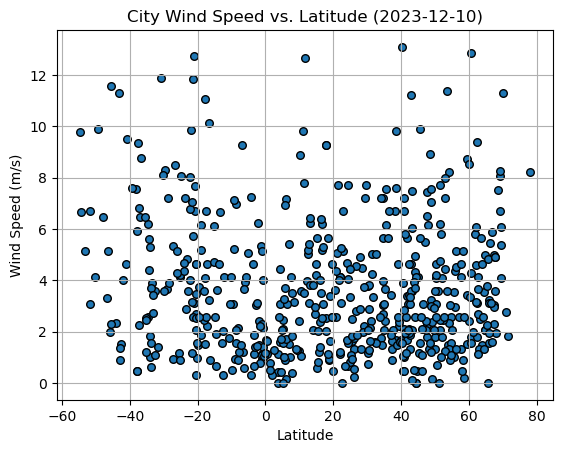

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(x = "Lat",
                  y = "Wind Speed",
                  kind = "scatter",
                  edgecolors = "black",
                  s = 30
                 )

# Incorporate the other graph properties
plt.title(f"City Wind Speed vs. Latitude ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_plot(x_values, y_values, y_label, x_ann, y_ann):
    plt.scatter(x = x_values,
                y = y_values,
                s = 30
               )
    slope, intercept, r, p, ser = linregress(x_values, y_values)
    y_corr = slope * x_values + intercept
    plt.plot(x_values,
             y_corr,
             "r-"
            )
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.annotate(f'y = {round(slope, 2)}x + {round(intercept, 2)}',
                 (x_ann, y_ann),
                 color = "red",
                 size = 15
                )
    print(f'The r-value is: {r**2}')
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-26.17,98,45,1.96,RU,1702246603
7,ahmadnagar,19.0833,74.7333,19.22,67,54,1.63,IN,1702247012
9,ust-nera,64.5667,143.2000,-19.31,98,100,3.54,RU,1702246617
10,bethel,41.3712,-73.4140,14.39,89,100,2.57,US,1702246378
11,talnakh,69.4865,88.3972,-27.11,99,100,4.11,RU,1702246666


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,atafu village,-8.5421,-172.5159,28.53,79,96,6.98,TK,1702246605
2,port mathurin,-19.6833,63.4167,26.07,78,52,3.75,MU,1702246714
3,port-aux-francais,-49.3500,70.2167,3.56,78,56,9.91,TF,1702246575
4,avarua,-21.2078,-159.7750,27.03,78,75,11.83,CK,1702246526
5,alice springs,-23.7000,133.8833,13.75,67,75,7.20,AU,1702246629


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6912120634801117


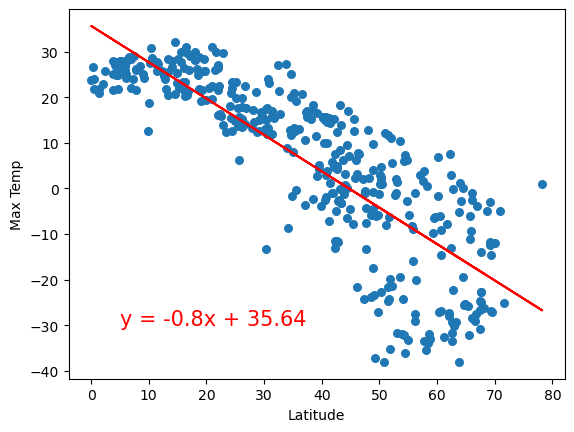

In [15]:
# Linear regression on Northern Hemisphere
lin_plot(northern_hemi_df["Lat"],
         northern_hemi_df["Max Temp"],
         "Max Temp",
         5,
         -30
        )

The r-value is: 0.3845228832338089


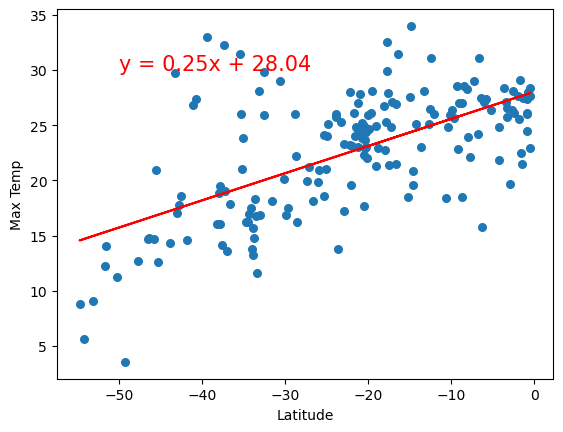

In [16]:
# Linear regression on Southern Hemisphere
lin_plot(southern_hemi_df["Lat"],
         southern_hemi_df["Max Temp"],
         "Max Temp",
         -50,
         30
        )

**Discussion about the linear relationship:**

With the equator having Latitude 0, the further away from it you go, the temperature (and therefore Max Temp) will be cooler than at the equator. Since the Northern Hemisphere has latitudes that are positive, then the graph will have a downward trend. Similarly, with the Southern Hemiphere having negative latitudes, then the graph will have a negative trend.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11719310389467438


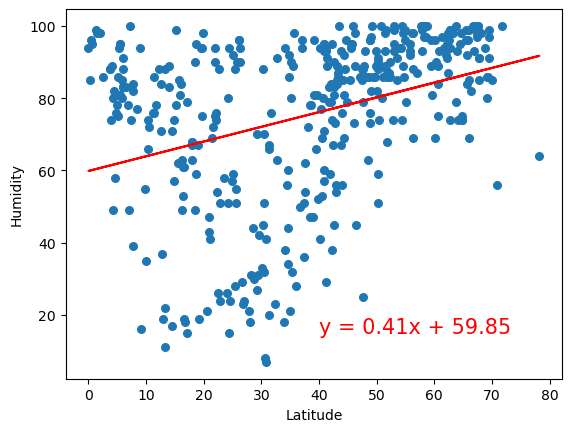

In [17]:
# Northern Hemisphere
lin_plot(northern_hemi_df["Lat"],
         northern_hemi_df["Humidity"],
         "Humidity",
         40,
         15
        )

The r-value is: 0.10783194523913954


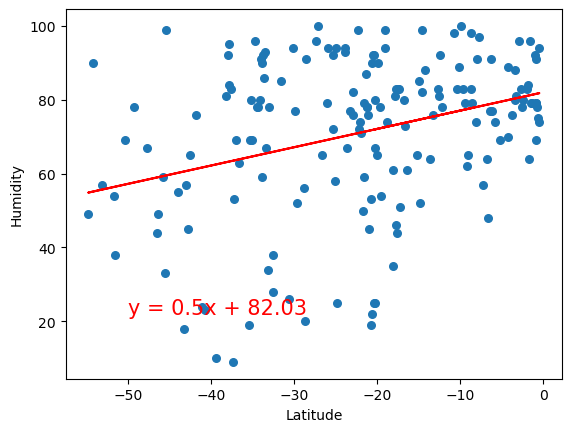

In [18]:
# Southern Hemisphere
lin_plot(southern_hemi_df["Lat"],
         southern_hemi_df["Humidity"],
         "Humidity",
         -50,
         22
        )

**Discussion about the linear relationship:**

Since precipitation of some type (rain / ice / snow) occurs almost everywhere on the planet, the amount of humidity should not correlate to the latitude of the place on Earth. This can be seen by the low r-value for both graphs. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07541548493889605


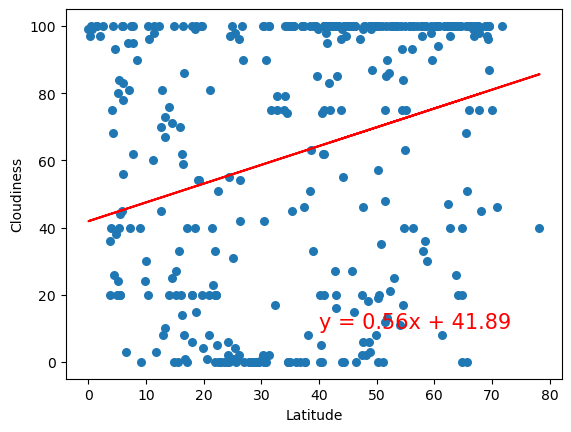

In [19]:
# Northern Hemisphere
lin_plot(northern_hemi_df["Lat"],
         northern_hemi_df["Cloudiness"],
         "Cloudiness",
         40,
         10
        )

The r-value is: 0.05089838425888668


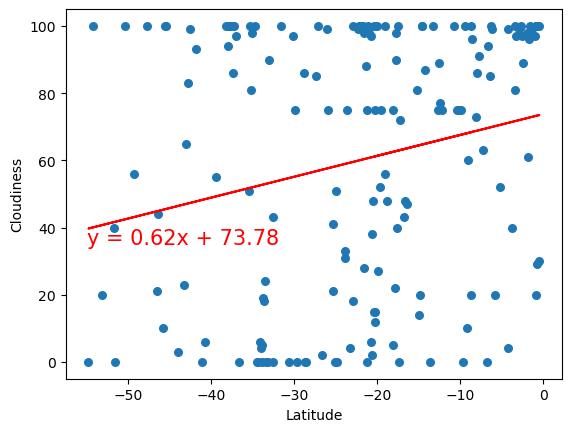

In [20]:
# Southern Hemisphere
lin_plot(southern_hemi_df["Lat"],
         southern_hemi_df["Cloudiness"],
         "Cloudiness",
         -55,
         35
        )

**Discussion about the linear relationship:**

Because clouds move with the wind and are created anywhere, the amount of cloudiness won't be related to the latitude of the city.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.018463045353448688


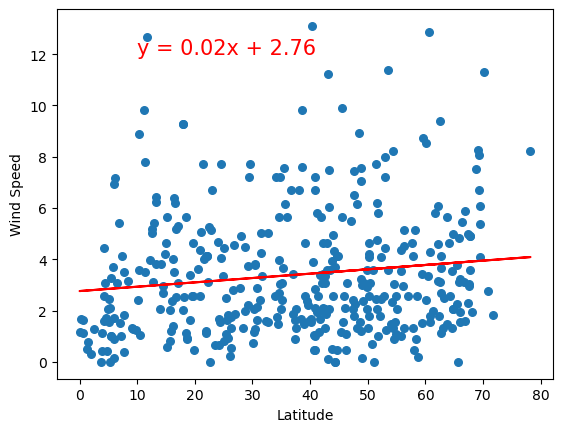

In [21]:
# Northern Hemisphere
lin_plot(northern_hemi_df["Lat"],
         northern_hemi_df["Wind Speed"],
         "Wind Speed",
         10,
         12
        )

The r-value is: 0.08397010659490983


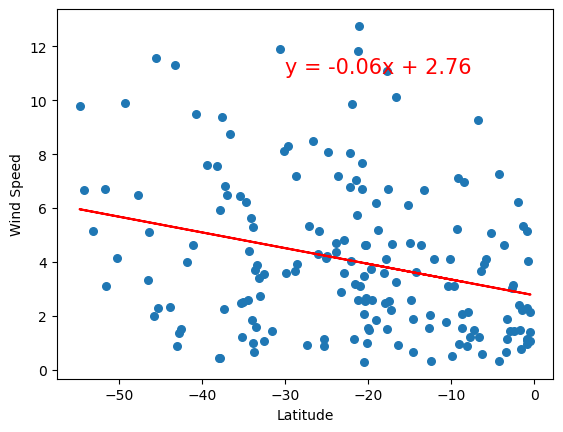

In [22]:
# Southern Hemisphere
lin_plot(southern_hemi_df["Lat"],
         southern_hemi_df["Wind Speed"],
         "Wind Speed",
         -30,
         11
        )

**Discussion about the linear relationship:**

The wind speed can vary at a location, depending on multiple factors, such as weather, cloud cover, temperature, etc. This means that it's not tied directly to the latitude of a location, which is verified by the very small r-values in both hemispheres.